In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


# 1 Carga de datos

#  Definir la ruta al dataset de forma relativa
ruta_csv = Path("diabetes_prediction_dataset.csv")

#  Cargar el dataset
datos = pd.read_csv(ruta_csv)

# . Seleccionar las columnas relevantes
datosR = datos[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]

#2 Limpieza de datos

#  Eliminar filas con valores nulos (si existen)
datos_limpios = datosR.dropna()

#  Definir los rangos válidos para cada columna
rangos = {
    'age': (0, 80),
    'bmi': (10.16, 71.55),
    'HbA1c_level': (0, 100)  
    }
#  Filtrar los datos para mantener solo aquellos que están dentro de los rangos válidos
datos_validos = datos_limpios[
    (datos_limpios['age'].between(*rangos['age'])) &
    (datos_limpios['bmi'].between(*rangos['bmi'])) &
    (datos_limpios['HbA1c_level'].between(*rangos['HbA1c_level'])) 
   ]

#  Separar características y variable objetivo
X = datos_validos[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = datos_validos['diabetes']

# 3 Evaluación del modelo KNN con K=1, 10-fold cross validation, y min_max()

#  Configurar KNN y 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

#  Función para normalizar usando Min-Max Scaling
def min_max_scaler(train, test):
    scaler = MinMaxScaler()
    scaler.fit(train)  # Ajustar el escalador solo con el conjunto de entrenamiento
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    return train_scaled, test_scaled
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Normalizar los datos
    X_train_scaled, X_test_scaled = min_max_scaler(X_train, X_test)
    
    # Entrenar el modelo
    knn.fit(X_train_scaled, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = knn.predict(X_test_scaled)
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

#  Mostrar resultados
accuracy_promedio = np.mean(accuracies)
accuracy_desviacion = np.std(accuracies)

print(f"Precisión promedio: {accuracy_promedio:.2f}")
print(f"Desviación estándar: {accuracy_desviacion:.2f}")

Precisión promedio: 0.95
Desviación estándar: 0.00


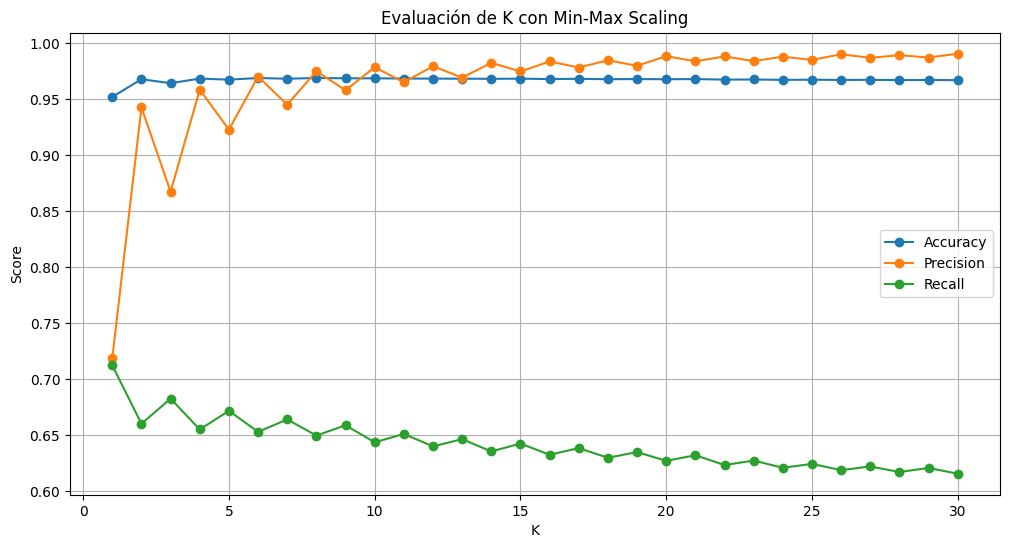

El mejor K basado en el balance de las métricas es: 8


In [9]:
# 4 Encontrar el Mejor K
# Evaluar el modelo KNN con diferentes valores de K (1 a 30)
k_values = range(1, 31)
accuracy_scores = []
precision_scores = []
recall_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform',n_jobs=-1)
    accuracies = []
    precisions = []
    recalls = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Normalizar los datos 
        X_train_scaled, X_test_scaled = min_max_scaler(X_train, X_test)
        
        # Entrenar el modelo
        knn.fit(X_train_scaled, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = knn.predict(X_test_scaled)
        
        # Calcular métricas
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
    
    # Promediar las métricas para el valor actual de K
    accuracy_scores.append(np.mean(accuracies))
    precision_scores.append(np.mean(precisions))
    recall_scores.append(np.mean(recalls))

# Graficar las métricas
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Evaluación de K con Min-Max Scaling')
plt.legend()
plt.grid()
plt.show()


# Identificar el mejor K basado en un balance de las métricas
best_k_index = np.argmax([accuracy_scores[i] + precision_scores[i] + recall_scores[i] for i in range(len(k_values))])
best_k = k_values[best_k_index]

print(f"El mejor K basado en el balance de las métricas es: {best_k}")

In [10]:
# 4 Evaluación del modelo KNN con K=8, 10-fold cross validation, y min_max()

#  Configurar KNN y 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')

#  Función para normalizar usando Min-Max Scaling
def min_max_scaler(train, test):
    scaler = MinMaxScaler()
    scaler.fit(train)  # Ajustar el escalador solo con el conjunto de entrenamiento
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    return train_scaled, test_scaled
accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Normalizar los datos
    X_train_scaled, X_test_scaled = min_max_scaler(X_train, X_test)
    
    # Entrenar el modelo
    knn.fit(X_train_scaled, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = knn.predict(X_test_scaled)
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

#  Mostrar resultados
accuracy_promedio = np.mean(accuracies)
accuracy_desviacion = np.std(accuracies)

print(f"Precisión promedio: {accuracy_promedio:.2f}")
print(f"Desviación estándar: {accuracy_desviacion:.2f}")

Precisión promedio: 0.97
Desviación estándar: 0.00


#2 Se eliminaron los datos que fueran valores nulos y aquellos datos que se salieran de los rangos especificados por el enunciado.


#3 -La normalizacion es extremadamente importante para este caso debido a la diferencia que existe entre los rangos de valores de las distintas variables usadas. Si no se normalizara, los resultados estarian fuertemente sesgados hacia los datos que tuvieran una escala mayor. Al normalizar se deja todo en la misma escala dentro del rango [0,1]

-El procedimiento de normalización se realizó de la siguiente manera:
Se calculó el mínimo y máximo de cada característica utilizando únicamente el conjunto de entrenamiento.
Se aplicó la fórmula de normalización:
[ X_{\text{normalizado}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} ]
Los parámetros calculados (mínimo y máximo) se aplicaron tanto al conjunto de entrenamiento como al conjunto de prueba.

-La precision promedio fue de 95% lo cual es significativamente alto, esto implica que el modelo es bueno para predecir si una persona tendra diabetes o no. La desviacion estandar fue de 0, esto significa que el modelo tendra el mismo desempeño para los 10 folds realizados. Esta desviacion podria ser indicio de que exista una distribucion homogenea de los datos, o que el modelo sea demasiado simple (un k muy bajo). Para comprobar esto ultimo hay que cambiar K y ver que sucede.


#4 El mejor K sera el que tenga los mejores valores de las 3 metricas usadas. En base al análisis de los distintos K encontramos que el mejor es K=8
Al hacer el punto 3 con K=8, el accuracy promedio subio a 97% y la desviacion estandar se mantuvo en 0. Esto significa que efectivamente hubo una mejora en la precision del modelo al considerar K=8, y que este modelo tendra el mismo desempeño para cualquiera de los 10 folds que se hicieron. 